In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statistics import *
import heartpy as hp
import copy
from IPython.display import display
pd.options.display.max_rows = 450

import pwv
import importlib
importlib.reload(pwv)

<module 'pwv' from '/home/anrath/projects/research/PWV/pwv.py'>

# Parameters

In [2]:
# List of Booleans. If True, returns a matplotlib plot of corresponding data. Bool 1 = unfiltered waveform. Bool 2 = filtered waveform. Bool 3 = segmented waveform.
preprocess_returnPlot = [True, True, True]
# Index of patient whose data will be shown in plots
preprocess_patPlotShow = 0
preprocess_plotID_patient = 0
preprocess_plotID_segment = 0

# Preprocessing

In [3]:
waveformData, segmentIndices, plots = pwv.preprocess("/home/anrath/projects/research/josie/PWV/full_demo/Raw Data", returnPlot=preprocess_returnPlot, patPlotShow=preprocess_patPlotShow)

/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/ma/core.py:5244: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


## Filtering Waveforms

### Raw Waveforms

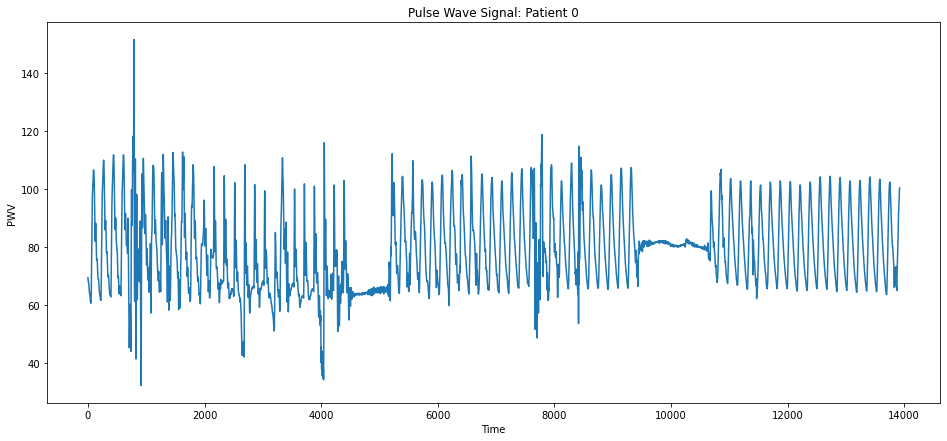

In [4]:
plots[0]

We can filter the waveform using highpass and lowpass Butterworth filters to get a smoother wave.

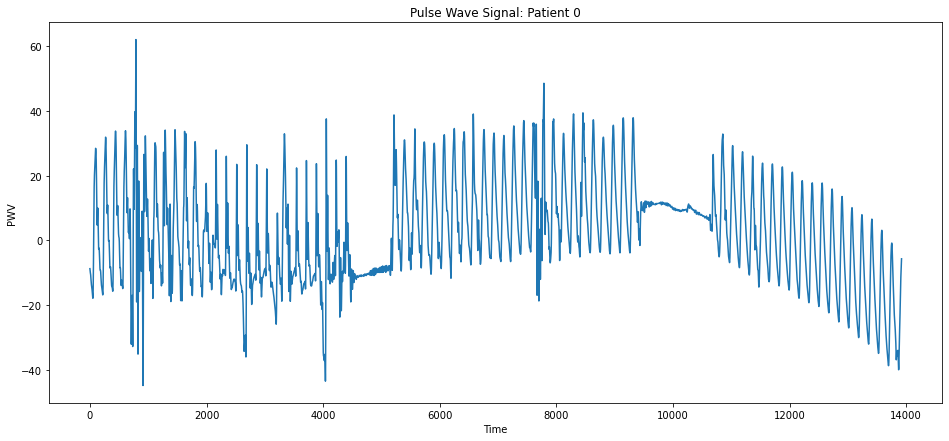

In [5]:
plots[1]

## Segmentation of Waveforms
Below is the filtered waveform for the selected patient. We will examine the first 4000 values.

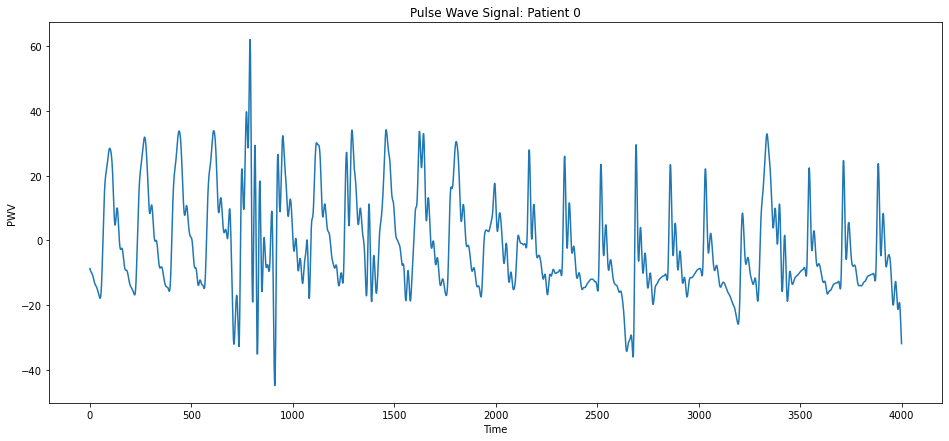

In [6]:
plots[2]

We can segment this waveform into each individual pulsewave.

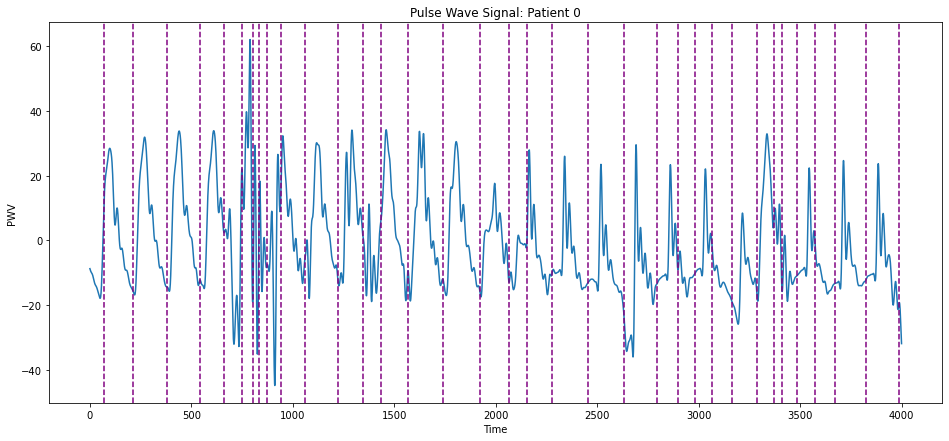

In [7]:
plots[3]

We can also plot inidivdual segments.

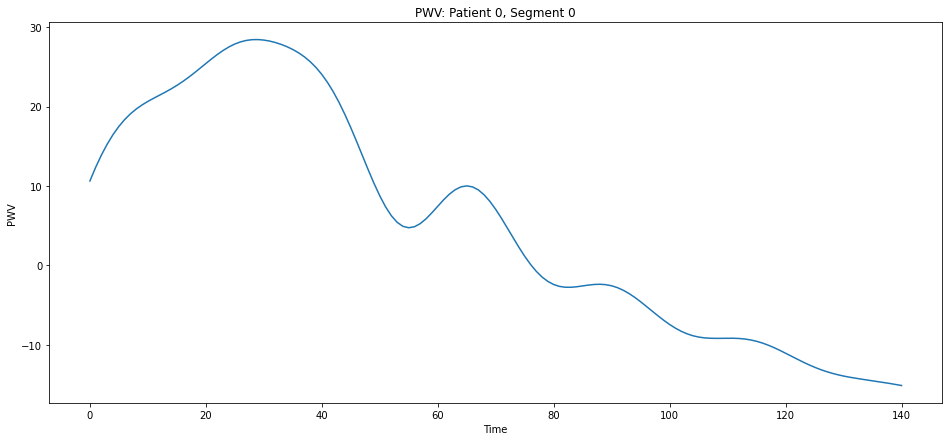

In [8]:
%matplotlib inline

plots = pwv.plotSegment(waveformData, segmentIndices)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

In [9]:
%matplotlib notebook

plots, points, mets = pwv.interPlotSegment(waveformData, segmentIndices)
print(mets)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

<IPython.core.display.Javascript object>

[742.7328148877555, 21.880647115402162, 634.5387663466627, 29, 1.1110007936805029, 111, 123.32108809853581, 20.513036924166574, -0.10290132418696363, 1148.730067753328, 56, 19.044122274320944, 23.56555474598616, 514.1913014066655, 27, 13.777293437893793, 15.246208087739422, 16.61381827897501, -4.1558280427466485, -0.23802516987123518, 84, -4.653216825096783, 0.3997541246862646, 15.246208087739422]


<IPython.core.display.Javascript object>

# Metric Calculation

In [10]:
metrics = pwv.analyzeWave(waveformData, segmentIndices)

In [11]:
metrics

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,742.732815,21.880647,634.538766,29.0,1.111001,111.0,123.321088,20.513037,-0.102901,...,27.0,13.777293,15.246208,16.613818,-4.155828,-0.238025,84.0,-4.653217,0.399754,15.246208
1,0.0,695.696916,7.283739,437.024367,60.0,2.504853,109.0,273.028942,11.472693,0.274182,...,26.0,10.190195,0.523378,-3.665576,-8.444463,-0.273184,83.0,-3.332510,2.631455,0.523378
2,0.0,943.154736,8.426206,505.572349,60.0,4.366985,103.0,449.799427,12.683733,0.252296,...,28.0,11.047212,1.923938,-2.333589,-6.392811,-0.267319,75.0,-2.143957,2.927937,1.923938
3,0.0,1212.466144,5.850068,386.104501,66.0,15.845467,52.0,823.964308,10.682719,0.228448,...,26.0,9.765271,-2.502227,-7.334877,2.660522,-0.244446,26.0,8.740719,4.432001,-2.502227
4,0.0,1425.871989,28.586050,1172.028061,41.0,17.872229,15.0,268.083440,26.502590,-0.714017,...,14.0,34.640540,40.742102,42.825562,32.111741,3.291442,1.0,-17.530954,3.291442,40.742102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,21.0,-411.466080,-2.176029,-108.801432,50.0,-8.311309,37.0,-307.518436,-3.690488,-0.318336,...,17.0,-12.998569,-8.544276,-7.029817,-13.165097,1.431448,20.0,-8.452858,28.628958,-8.544276
4616,21.0,589.809887,16.669626,366.731762,22.0,7.463984,33.0,246.311465,18.486671,0.607371,...,6.0,-0.487120,-7.149621,-8.966666,-18.172308,-1.702471,27.0,3.533942,2.902924,-7.149621
4617,21.0,183.086561,0.662273,10.596367,16.0,4.099880,43.0,176.294860,8.704375,1.633891,...,10.0,0.087143,-12.780220,-20.822321,-17.384714,-0.705149,33.0,-1.194622,2.019354,-12.780220
4618,21.0,-184.136334,-6.432375,-180.106508,28.0,0.779470,19.0,14.809923,-0.775652,0.653389,...,5.0,-1.260213,-32.937865,-38.594589,-31.382744,-2.765642,14.0,-9.978577,12.282977,-32.937865


# Machine Learning

In [12]:
metrics = metrics[metrics[0]!= 5]
metrics = metrics[metrics[0]!= 17]

outcomes = [0,1,1,0,1,-1,1,0,0,0,0,0,1,1,1,0,0,-1,0,0,1,0]

metrics['25'] = metrics.apply(lambda row: outcomes[int(row[0])], axis=1)
metrics = metrics.dropna()
metrics

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,742.732815,21.880647,634.538766,29.0,1.111001,111.0,123.321088,20.513037,-0.102901,...,13.777293,15.246208,16.613818,-4.155828,-0.238025,84.0,-4.653217,0.399754,15.246208,0
1,0.0,695.696916,7.283739,437.024367,60.0,2.504853,109.0,273.028942,11.472693,0.274182,...,10.190195,0.523378,-3.665576,-8.444463,-0.273184,83.0,-3.332510,2.631455,0.523378,0
2,0.0,943.154736,8.426206,505.572349,60.0,4.366985,103.0,449.799427,12.683733,0.252296,...,11.047212,1.923938,-2.333589,-6.392811,-0.267319,75.0,-2.143957,2.927937,1.923938,0
3,0.0,1212.466144,5.850068,386.104501,66.0,15.845467,52.0,823.964308,10.682719,0.228448,...,9.765271,-2.502227,-7.334877,2.660522,-0.244446,26.0,8.740719,4.432001,-2.502227,0
4,0.0,1425.871989,28.586050,1172.028061,41.0,17.872229,15.0,268.083440,26.502590,-0.714017,...,34.640540,40.742102,42.825562,32.111741,3.291442,1.0,-17.530954,3.291442,40.742102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,21.0,-411.466080,-2.176029,-108.801432,50.0,-8.311309,37.0,-307.518436,-3.690488,-0.318336,...,-12.998569,-8.544276,-7.029817,-13.165097,1.431448,20.0,-8.452858,28.628958,-8.544276,0
4616,21.0,589.809887,16.669626,366.731762,22.0,7.463984,33.0,246.311465,18.486671,0.607371,...,-0.487120,-7.149621,-8.966666,-18.172308,-1.702471,27.0,3.533942,2.902924,-7.149621,0
4617,21.0,183.086561,0.662273,10.596367,16.0,4.099880,43.0,176.294860,8.704375,1.633891,...,0.087143,-12.780220,-20.822321,-17.384714,-0.705149,33.0,-1.194622,2.019354,-12.780220,0
4618,21.0,-184.136334,-6.432375,-180.106508,28.0,0.779470,19.0,14.809923,-0.775652,0.653389,...,-1.260213,-32.937865,-38.594589,-31.382744,-2.765642,14.0,-9.978577,12.282977,-32.937865,0


In [13]:
x_train, x_test, y_train, y_test = pwv.MLSplit(metrics)

np.where(metrics.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [14]:
z, accuracy, precision, recall = pwv.logistic(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy) # metrics.accuracy_score(y_test, y_pred)
print("Precision:", precision) # metrics.precision_score(y_test, y_pred)
print("Recall:", recall) # metrics.recall_score(y_test, y_pred)

     True  Prediction
0       1           1
1       0           1
2       0           0
3       0           1
4       0           1
..    ...         ...
893     0           1
894     1           1
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.7538975501113586
Precision: 0.7640047675804529
Recall: 0.9653614457831325


/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
z, accuracy, precision, recall = pwv.decisionTree(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           0
1       0           1
2       0           0
3       0           1
4       0           1
..    ...         ...
893     0           1
894     1           1
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.8073496659242761
Precision: 0.8680659670164917
Recall: 0.8719879518072289


In [16]:
z, accuracy, precision, recall = pwv.sv(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       0           1
2       0           0
3       0           1
4       0           1
..    ...         ...
893     0           0
894     1           1
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.7739420935412027
Precision: 0.7760479041916167
Recall: 0.9759036144578314


In [17]:
z, accuracy, precision, recall = pwv.KNeighbors(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       0           1
2       0           0
3       0           1
4       0           1
..    ...         ...
893     0           0
894     1           0
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.8073496659242761
Precision: 0.8604992657856094
Recall: 0.8825301204819277


In [18]:
z, accuracy, precision, recall = pwv.gaussianNB(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       0           1
2       0           0
3       0           1
4       0           1
..    ...         ...
893     0           0
894     1           1
895     1           1
896     1           1
897     1           1

[898 rows x 2 columns]
Accuracy: 0.7616926503340757
Precision: 0.8813559322033898
Recall: 0.7831325301204819
